In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [197]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.txt")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.txt")



In [198]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [199]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [200]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [201]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [202]:
train.shape

(614, 13)

In [203]:
test.shape

(367, 12)

In [204]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [205]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

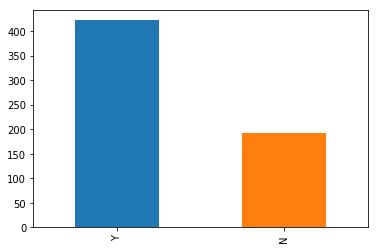

In [206]:
train['Loan_Status'].value_counts().plot.bar()

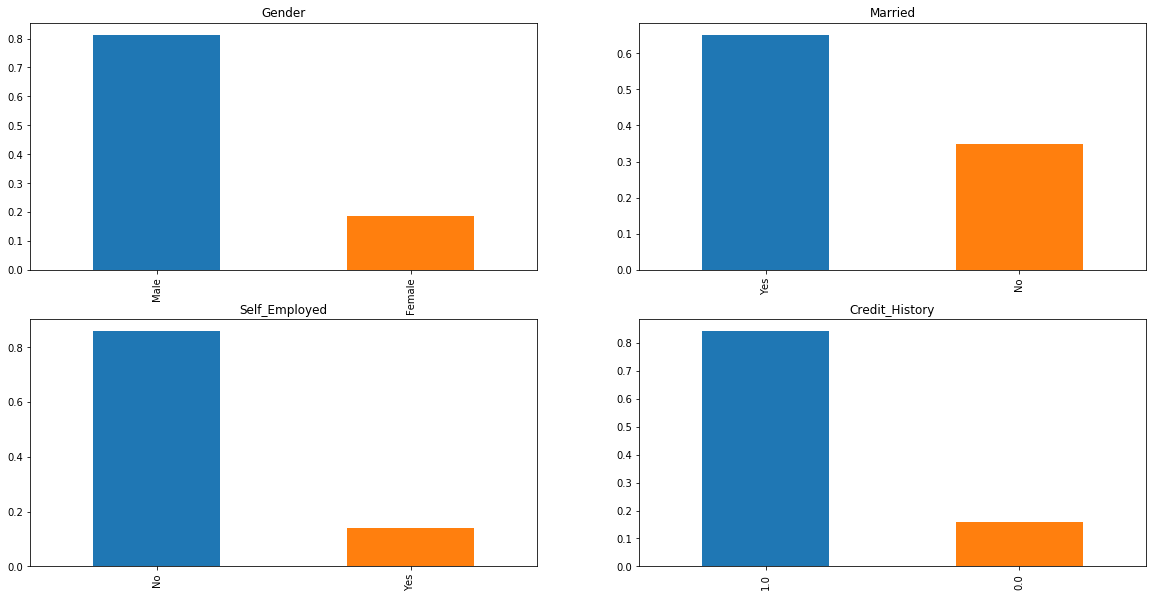

In [207]:
# Independent Variable (Categorical)

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar( title = 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar( title = 'Credit_History')

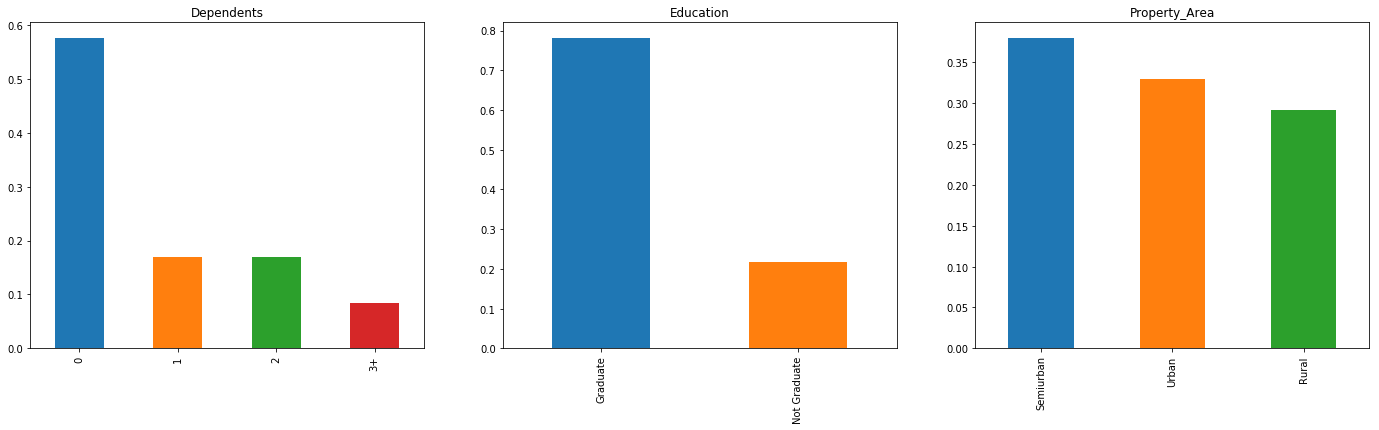

In [208]:
# Independent Variable (Ordinal)

plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

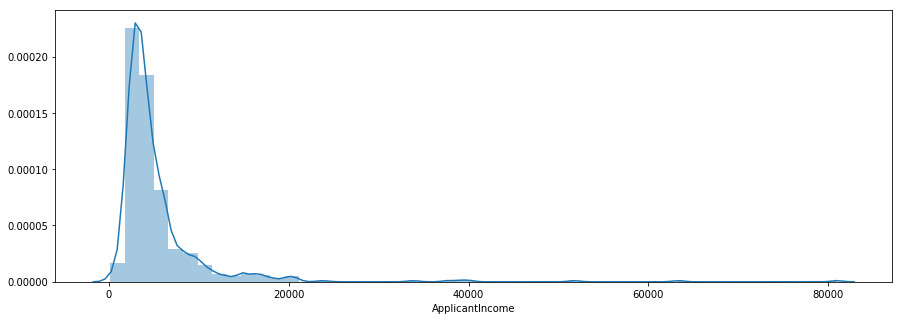

In [209]:
# Independent Variable (Numerical)

plt.figure(1, figsize=(15,5))
sns.distplot(train['ApplicantIncome'])

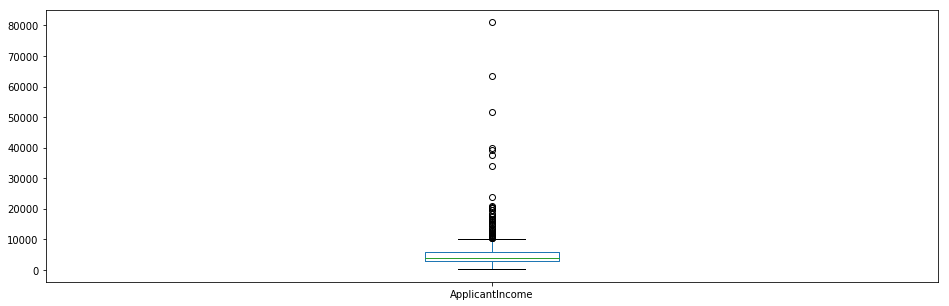

In [210]:
plt.figure(1)
train['ApplicantIncome'].plot.box(figsize=(16,5)) 

Text(0.5, 0.98, '')

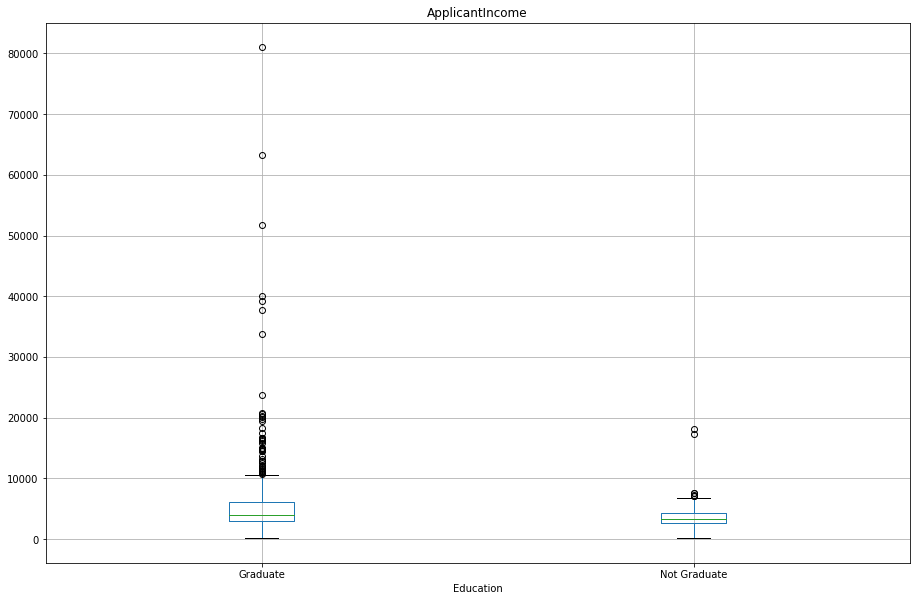

In [211]:
train.boxplot(column = 'ApplicantIncome', by = 'Education', figsize = (15,10))
plt.suptitle("")

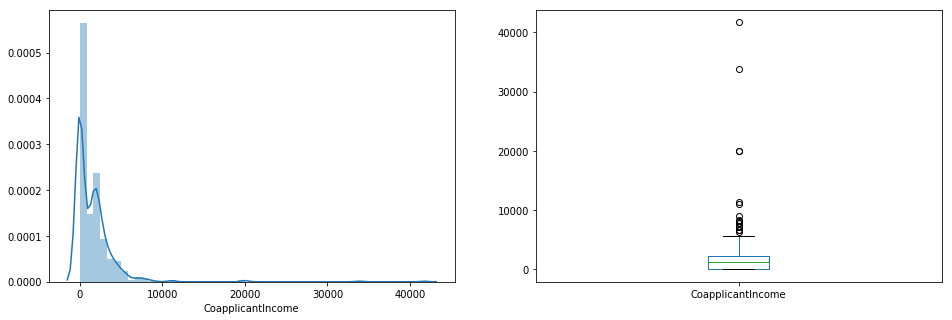

In [212]:
# Coapplicant income distribution.

plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

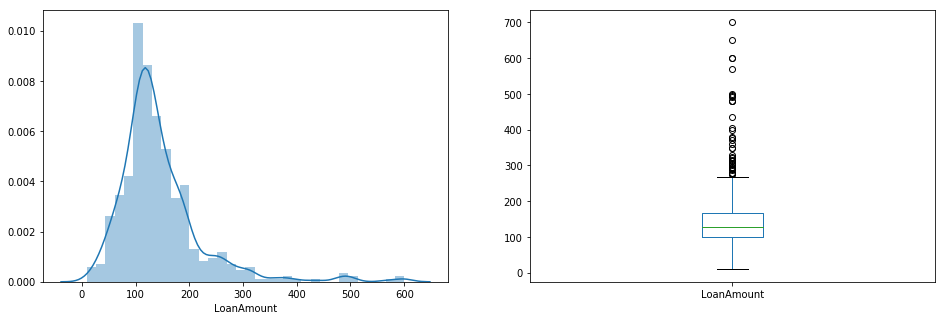

In [213]:
#  distribution of LoanAmount variable.

plt.figure(1)
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount'])

plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

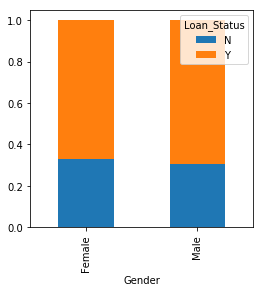

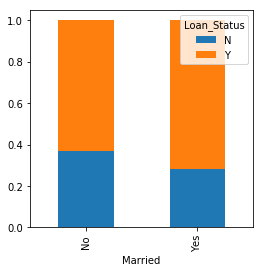

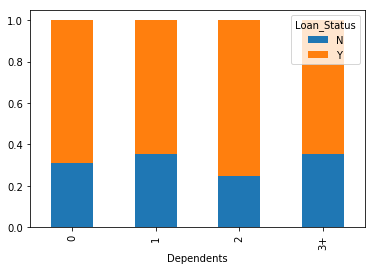

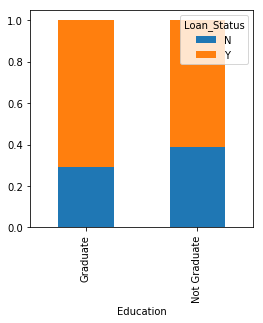

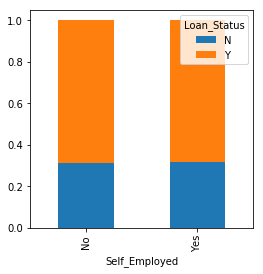

In [214]:
# Bivariate Analysis
# Categorical Independent Variable vs Target Variable

Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

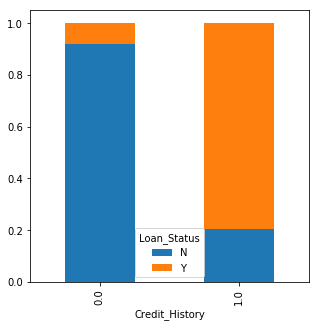

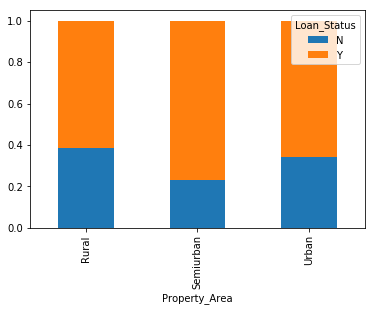

In [215]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

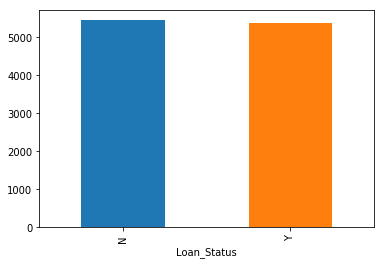

In [216]:
# find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

# Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed
# that if the applicant income is high the chances of loan approval will also be high.

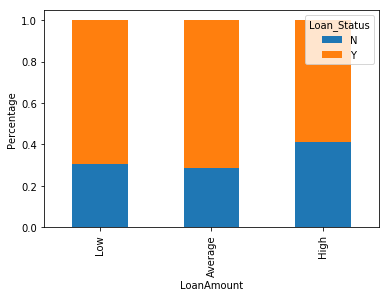

In [217]:
# visualize the Loan amount variable

bins=[0,100,200,700] 
group=['Low','Average','High']
train['LoanAmount_bin']  = pd.cut(df['LoanAmount'], bins, labels = group )
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
plt.ylabel('Percentage')

train=train.drop([ 'LoanAmount_bin'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

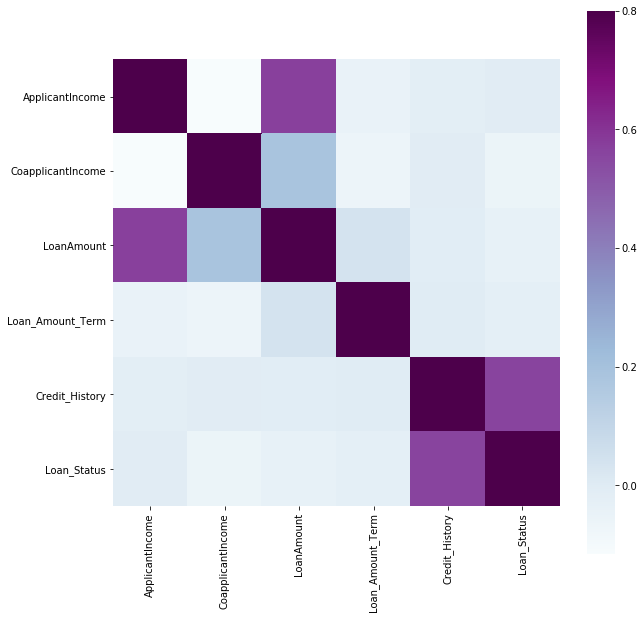

In [218]:
# correlation between all the numerical variables.

matrix = train.corr()
ax = plt.subplots(figsize = (10,10))
sns.heatmap(matrix, vmax = 0.8, square  = True, cmap = "BuPu")

In [219]:
# Missing Value and Outlier Treatment

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [220]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [221]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [222]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [223]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [224]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

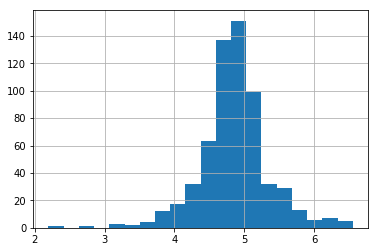

In [225]:
# It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution.

train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

In [226]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)


In [227]:
x = train.drop('Loan_Status',1) 
y = train.Loan_Status

x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(test.shape)
print(train.shape)
y.shape

(367, 21)
(614, 22)


(614,)

In [245]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size =0.25)

In [246]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
                           max_iter=600, multi_class='ovr', n_jobs=1, penalty='l2', random_state=37, 
                           solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)


0.8376623376623377

In [254]:
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


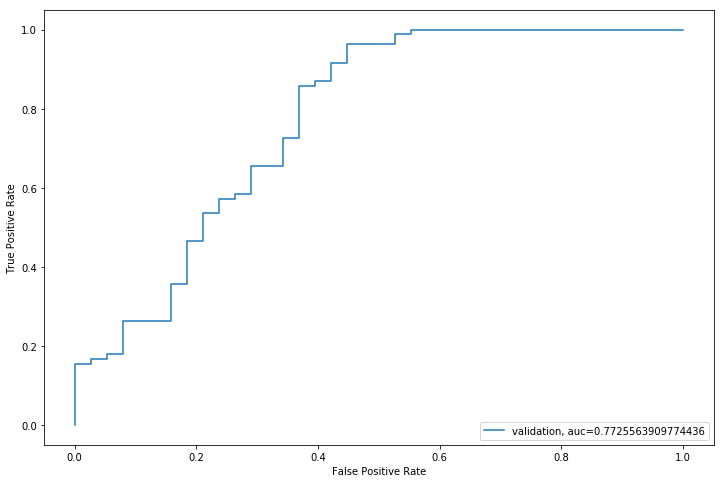

In [256]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

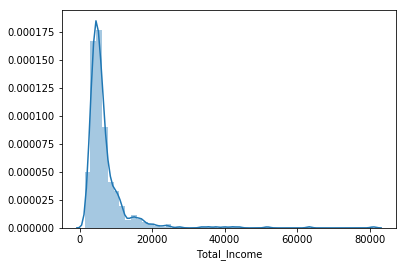

In [260]:
# Feature Engineering

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income'])


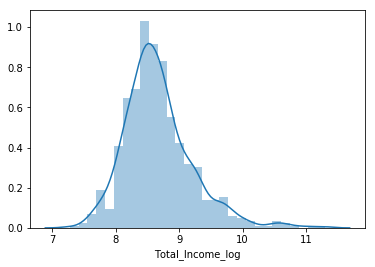

In [261]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

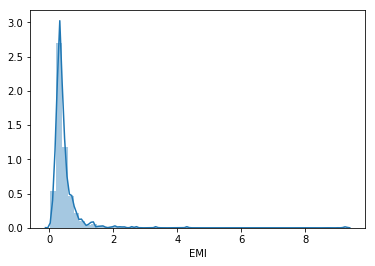

In [263]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

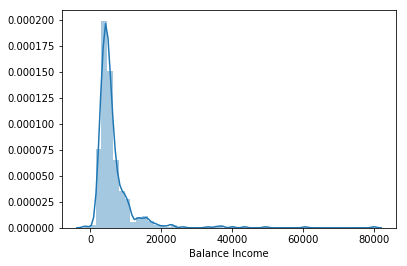

In [264]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [272]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [274]:
# Logistic Regression

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
   # pred_test = model.predict(test) 
   # pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


In [275]:
from sklearn import tree
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    #pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.7419354838709677

3 of kfold 5
accuracy_score 0.7049180327868853

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7049180327868853


In [276]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

#pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8225806451612904

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7295081967213115

5 of kfold 5
accuracy_score 0.8114754098360656


In [290]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                                                            max_depth=None, max_features='auto', max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0, min_impurity_split=None, 
                                                                            min_samples_leaf=1, min_samples_split=2,
                                                                            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                                                                            oob_score=False, random_state=1, verbose=0, warm_start=False),       
             fit_params=None, iid=True, n_jobs=1,       
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 
                                    'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       
             pre_dispatch='2*n_jobs',
             refit=True, 
             return_train_score='warn',       
             scoring=None, verbose=0)
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                       max_depth=3, max_features='auto', max_leaf_nodes=None,  
                       min_impurity_decrease=0.0, min_impurity_split=None,            
                        min_samples_leaf=1, min_samples_split=2,            
                        min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,            
                        oob_score=False, random_state=1, verbose=0, warm_start=False)

#So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    #pred_test = model.predict(test) 
    #pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.819672131147541


In [289]:
from xgboost import XGBClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=20, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7704918032786885

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8360655737704918
